In [1]:
import os
import torch
import numpy as np
from pprint import pprint
from dataclasses import dataclass, asdict
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec

import torch.nn.functional as F

from conditional_rate_matching.models.generative_models.crm import CRM
from conditional_rate_matching.configs.configs_classes.config_crm import CRMConfig

from conditional_rate_matching.models.metrics.crm_loglikelihood import calculate_batch_log_likelihood,rate_to_probabilities
from conditional_rate_matching.models.metrics.crm_loglikelihood import get_log_likelihood,get_log_likelihood_states_dataloader

from torch.distributions import Categorical,Dirichlet

from conditional_rate_matching.models.temporal_networks.temporal_networks_config import (
    TemporalMLPConfig,
    TemporalDeepMLPConfig
)

In [2]:
from conditional_rate_matching.utils.plots.histogram_colors_plots import (
    get_conditional_histograms_paths,
    categorical_counts_per_path,
    plot_time_series_histograms
)

In [3]:
from conditional_rate_matching import results_path
results_path

WindowsPath('C:/Users/cesar/Desktop/Projects/DiffusiveGenerativeModelling/Codes/conditional_rate_matching/results')

In [4]:
experiment_path_forward = results_path / "prenzlauer_experiment" / "colors_log_likelihood" / "forward"
experiment_path_backward = results_path / "prenzlauer_experiment" / "colors_log_likelihood" / "backward"

In [5]:
crm = CRM(experiment_dir=experiment_path_forward)
crm_b = CRM(experiment_dir=experiment_path_backward)

In [6]:
dimensions = crm.config.data1.dimensions
vocab_size = crm.config.data1.vocab_size

In [7]:
crm_b.config.pipeline.number_of_steps = 100
get_log_likelihood(crm,crm_b,ignore_=0)

100it [00:00, 580.33it/s]
100it [00:00, 900.84it/s]
100it [00:00, 840.97it/s]
100it [00:00, 763.44it/s]
100it [00:00, 733.84it/s]
100it [00:00, 876.16it/s]
100it [00:00, 923.67it/s]
100it [00:00, 1017.04it/s]
100it [00:00, 950.00it/s]


tensor(-0.2218, grad_fn=<NegBackward0>)

In [8]:
get_log_likelihood_states_dataloader(crm)

tensor(-0.1441)

# Plot paths for sanity check

In [15]:
x_f, x_path, t_path = crm.pipeline(sample_size=500,return_path=True)
x_f, x_path_b, t_path_b = crm_b.pipeline(sample_size=500,return_path=True)

100it [00:00, 695.49it/s]
100it [00:00, 838.94it/s]
100it [00:00, 728.44it/s]
100it [00:00, 794.26it/s]
100it [00:00, 792.35it/s]
100it [00:00, 762.37it/s]
100it [00:00, 828.38it/s]
100it [00:00, 763.40it/s]


In [19]:
generative_histogram = categorical_counts_per_path(x_path,dimensions=dimensions,vocab_size=vocab_size,normalize=True)
generative_histogram_b = categorical_counts_per_path(x_path_b,dimensions=dimensions,vocab_size=vocab_size,normalize=True)
conditional_histograms_paths = get_conditional_histograms_paths(crm,t_path)

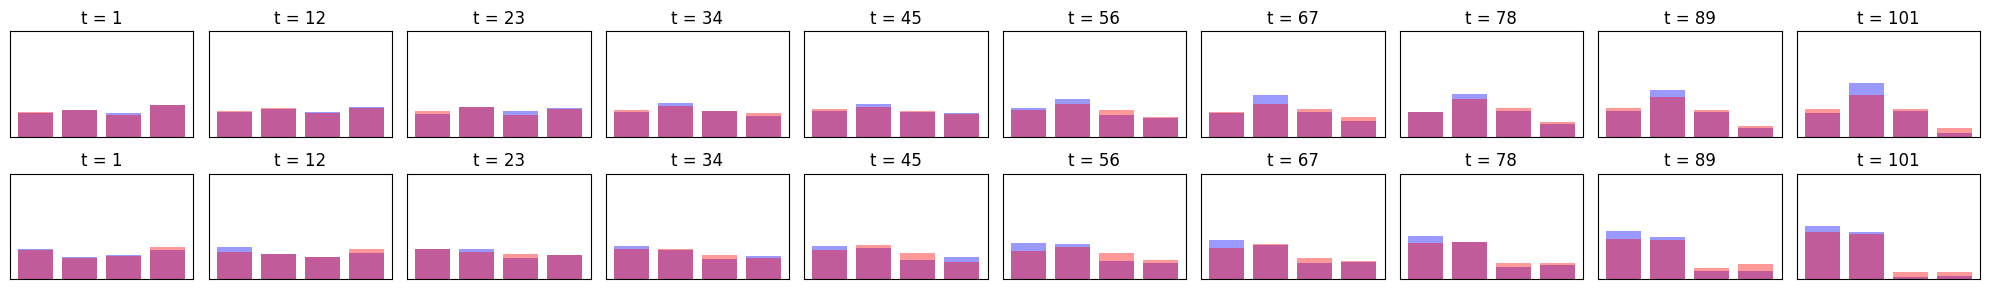

array([  0,  11,  22,  33,  44,  55,  66,  77,  88, 100])

In [21]:
plot_time_series_histograms(conditional_histograms_paths,generative_histogram,num_timesteps_to_plot=10,figsize_tuple=(20, 3),plot_path=None)

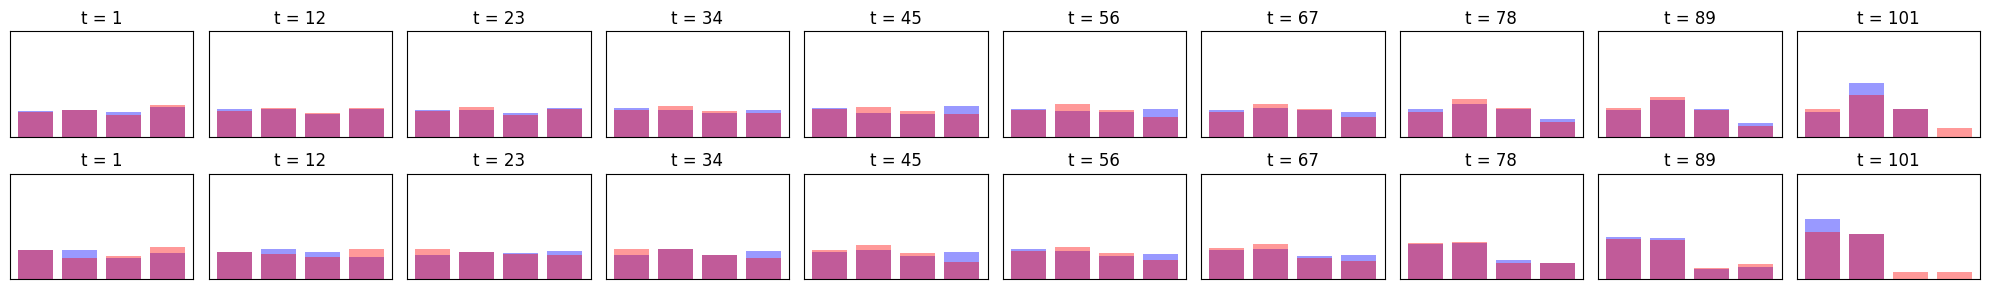

array([  0,  11,  22,  33,  44,  55,  66,  77,  88, 100])

In [22]:
plot_time_series_histograms(torch.flip(generative_histogram_b,dims=[0]),generative_histogram,num_timesteps_to_plot=10,figsize_tuple=(20, 3),plot_path=None)